In [10]:

%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
from PIL import Image
from sklearn.decomposition import PCA
import glob
import string

1) We want to check if there are the same sample labels in the Noa file and the AdRp file.  Yes


# Looking at column counts

2) Let's consider the Noa files, stored in /n/regal/informatics/tsackton/damid/Ychrom/new_data/processed/20_bowtie2/NoA/bed_ext_counts .  We want to do column sums across all files: `for file in *; do awk '{s+=$4}END{print s}' $file; done`. 
The results are stored in `file_sums_Noa`.  

In [11]:
file_sums_NoA = pd.read_table("20160222_col_sums_NoA.txt", header=None)

In [12]:
print file_sums_NoA[0].min()
print file_sums_NoA[0].max()
print file_sums_NoA[0].mean()

170696
15988987
5441375.39815


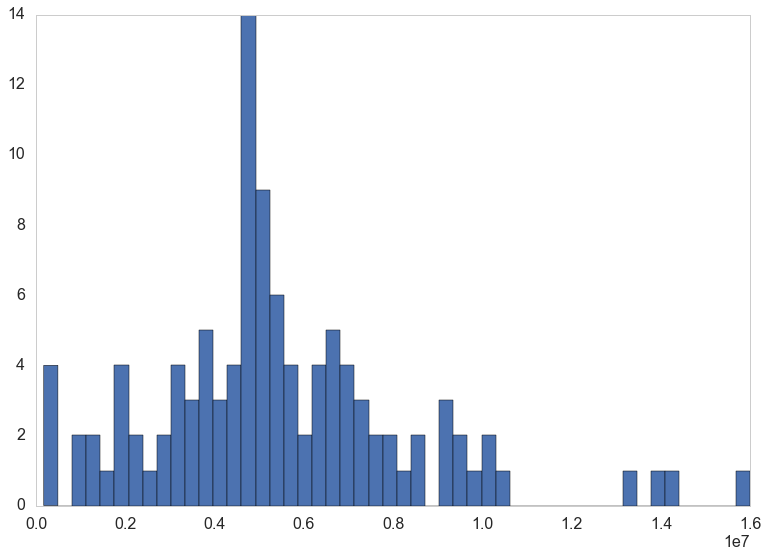

In [13]:
_=plt.hist(file_sums_NoA[0], bins=50)
plt.grid(False)

We find that the column counts vary very widely.  This raises two questions:
    1) do these column counts vary by tissue type/ country?
    2) do we see the same patterns in AdRp data?

To address the first point, we need the file names.  We get them by running `for file in *; do echo $file; done` in `/n/regal/informatics/tsackton/damid/Ychrom/new_data/processed/20_bowtie2/NoA/bed_ext_counts`

In [14]:
def split_names(row):
    labels=["RunProtein", "CountryLine", "TissueRep", "dataset", "notSure1", "notSure2"]
    d = {lab:ele for lab,ele in zip(labels, row.split("_"))}
    return d

def split_TissueRep(TissueRep):
    return {label:ele for label, ele in zip(["Tissue", "Rep"], TissueRep)}

def split_CountryLine(CL): 
    return {label:ele for label, ele in zip(["Country", "Line"], [CL[:2], CL[2:]])}

def separate_protein(RunProtein):
    return {label:ele for label, ele in zip(["NotSureProtein", "protein"], RunProtein.split("-"))}

file_names_NoA = pd.read_table("20160222_file_names_NoA.txt", header=None)

ind = [row.split("_cut")[0] for row in file_names_NoA[0].values]

file_names_NoA=pd.DataFrame([split_names(row) for row in file_names_NoA[0]])

file_names_NoA=pd.concat([file_names_NoA, pd.DataFrame([split_TissueRep(row) for row in file_names_NoA["TissueRep"]])], axis=1)
del file_names_NoA["TissueRep"]

file_names_NoA=pd.concat([file_names_NoA, pd.DataFrame([split_CountryLine(row) for row in file_names_NoA["CountryLine"]])], axis=1)
del file_names_NoA["CountryLine"]

file_names_NoA=pd.concat([file_names_NoA, pd.DataFrame([separate_protein(row) for row in file_names_NoA["RunProtein"]])], axis=1)
del file_names_NoA["RunProtein"]

file_names_NoA.index=ind

file_names_NoA.head()

,dataset,notSure1,notSure2,Rep,Tissue,Country,Line,NotSureProtein,protein
damID2-D1_Fr188_C1_NoA,NoA,cutadapt.ext,counts.bed,1,C,Fr,188,damID2,D1
damID2-D1_Fr188_C2_NoA,NoA,cutadapt.ext,counts.bed,2,C,Fr,188,damID2,D1
damID2-D1_Fr188_C3_NoA,NoA,cutadapt.ext,counts.bed,3,C,Fr,188,damID2,D1
damID2-D1_Fr188_T2_NoA,NoA,cutadapt.ext,counts.bed,2,T,Fr,188,damID2,D1
damID2-D1_Fr188_T3_NoA,NoA,cutadapt.ext,counts.bed,3,T,Fr,188,damID2,D1


In [42]:
file_sums_NoA.index = file_names_NoA.index.copy()


(0, 12)

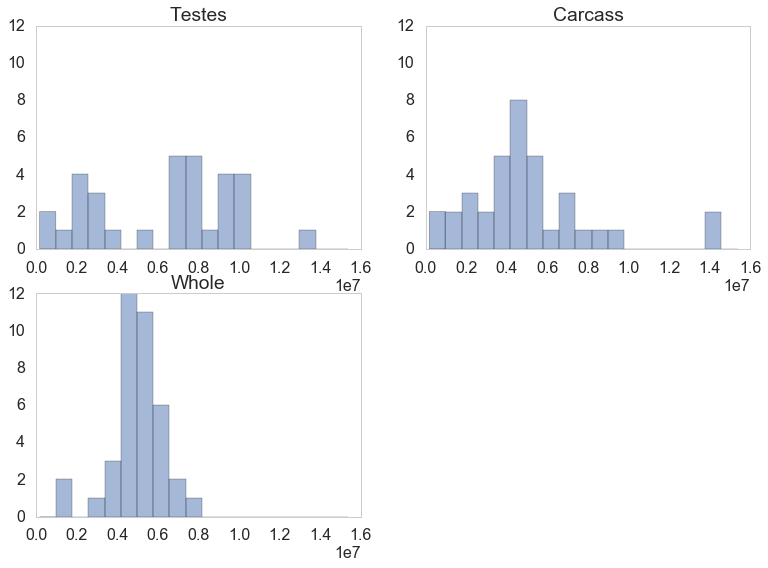

In [45]:
bins=range(170696,15988987,800000)

fig = plt.figure()
ax1 = fig.add_subplot(221)
_=ax1.hist(file_sums_NoA[file_names_NoA.Tissue=="T"][0].values,  alpha=.5, bins=bins)
ax1.set_title("Testes")
ax1.grid(b=False)
ax1.set_ylim([0,12])


ax2 = fig.add_subplot(222)
_=ax2.hist(file_sums_NoA[file_names_NoA.Tissue=="C"][0].values, alpha=.5, bins=bins)
ax2.set_title("Carcass")
ax2.grid(b=False)
ax2.set_ylim([0,12])

ax3 = fig.add_subplot(223)
_=ax3.hist(file_sums_NoA[file_names_NoA.Tissue=="w"][0].values, alpha=.5, bins=bins)
ax3.set_title("Whole")
ax3.grid(b=False)
ax3.set_ylim([0,12])


These histograms of column counts by tissue type all overlap, though "whole" has  amore restricted range.  We now look at the results by line.

(0, 6)

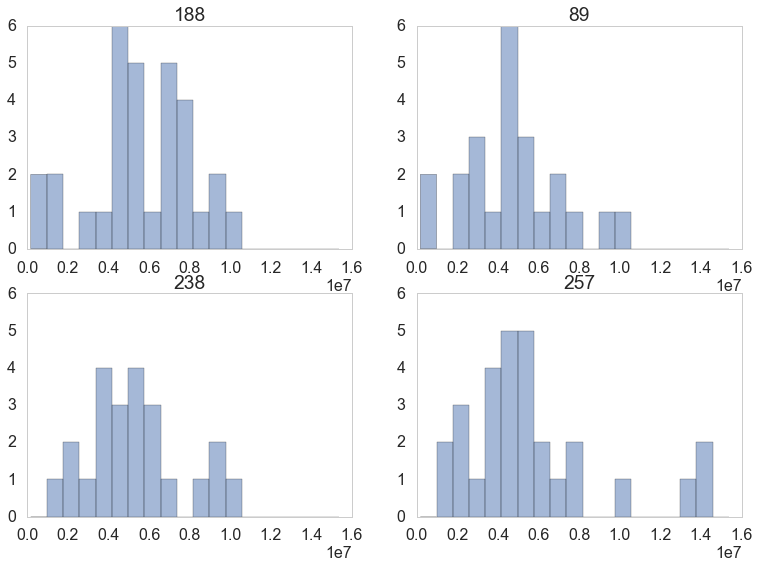

In [46]:
bins=range(170696,15988987,800000)

fig = plt.figure()
ax1 = fig.add_subplot(221)
_=ax1.hist(file_sums_NoA[file_names_NoA.Line=="188"][0].values,  alpha=.5, bins=bins)
ax1.set_title("188")
ax1.grid(b=False)
ax2.set_ylim([0,6])

ax2 = fig.add_subplot(222)
_=ax2.hist(file_sums_NoA[file_names_NoA.Line=="89"][0].values, alpha=.5, bins=bins)
ax2.set_title("89")
ax2.grid(b=False)
ax2.set_ylim([0,6])

ax3 = fig.add_subplot(223)
_=ax3.hist(file_sums_NoA[file_names_NoA.Line=="238"][0].values, alpha=.5, bins=bins)
ax3.set_title("238")
ax3.grid(b=False)
ax3.set_ylim([0,6])

ax4 = fig.add_subplot(224)
_=ax4.hist(file_sums_NoA[file_names_NoA.Line=="257"][0].values, alpha=.5, bins=bins)
ax4.set_title("257")
ax4.grid(b=False)
ax4.set_ylim([0,6])



Let's now identify files with particularly low column counts and particularly high column counts
- low counts: all France, mix of carcass and testes and different lines
- high counts: mostly zi 257, mix of carcass and testes

In [47]:
file_names_NoA[file_sums_NoA[0] <= 1000000]

,dataset,notSure1,notSure2,Rep,Tissue,Country,Line,NotSureProtein,protein
damID2-D1_Fr188_C1_NoA,NoA,cutadapt.ext,counts.bed,1,C,Fr,188,damID2,D1
damID2-D1_Fr188_C2_NoA,NoA,cutadapt.ext,counts.bed,2,C,Fr,188,damID2,D1
damID2-D1_Fr188_T2_NoA,NoA,cutadapt.ext,counts.bed,2,T,Fr,188,damID2,D1
damID2-D1_Fr89_C1_NoA,NoA,cutadapt.ext,counts.bed,1,C,Fr,89,damID2,D1
damID2-D1_Fr89_T2_NoA,NoA,cutadapt.ext,counts.bed,2,T,Fr,89,damID2,D1


In [48]:
file_names_NoA[file_sums_NoA[0] >= 10300000]

,dataset,notSure1,notSure2,Rep,Tissue,Country,Line,NotSureProtein,protein
damID3-Lam_Fr188_T1_NoA,NoA,cutadapt.ext,counts.bed,1,T,Fr,188,damID3,Lam
damID-Lam_Zi257_C1_NoA,NoA,cutadapt.ext,counts.bed,1,C,Zi,257,damID,Lam
damID-Lam_Zi257_C2_NoA,NoA,cutadapt.ext,counts.bed,2,C,Zi,257,damID,Lam
damID-Lam_Zi257_C3_NoA,NoA,cutadapt.ext,counts.bed,3,C,Zi,257,damID,Lam
damID-Lam_Zi257_T3_NoA,NoA,cutadapt.ext,counts.bed,3,T,Zi,257,damID,Lam


# Correlating NoA and AdRp counts

We run the following, located in `/n/home08/leking/20151019Sackton/BAM_analysis` to get the correlations

import numpy as np
import pandas as pd
import glob

path="/n/regal/informatics/tsackton/damid/Ychrom/new_data/processed/20_bowtie2"
subpath_AdRp="/AdRp/bed_ext_counts/"
subpath_NoA="/NoA/bed_ext_counts/"

for file1, file2 in zip(sorted(glob.glob(path+subpath_NoA+"*")), sorted(glob.glob(path+subpath_AdRp+"*"))):
        f1 = pd.read_table(file1, header=None)
        f2 = pd.read_table(file2, header=None)
        print file1.split("/")[-1], file2.split("/")[-1]
        print np.corrcoef(f1[3], f2[3])[0,1]
        
        


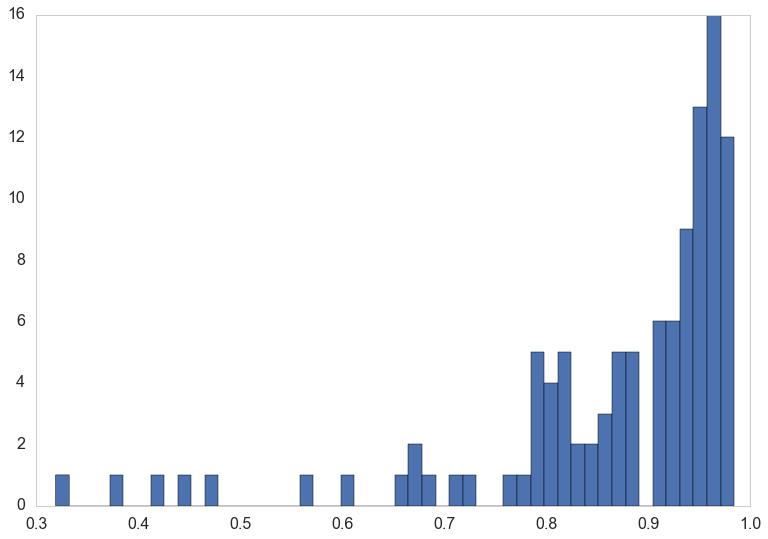

In [49]:
correls_NoA_AdRp = pd.read_table("20160222_NoA_AdRp_Correls.txt", header=None)
_=plt.hist(correls_NoA_AdRp[0], bins=50)
plt.grid(False)

You also get quite the range of correlations, though most are high (88 out of 108 are above .8)

In [52]:
correls_NoA_AdRp.index = file_names_NoA.index.copy()
print len(file_names_NoA[correls_NoA_AdRp[0]<.8])
print len(file_names_NoA[correls_NoA_AdRp[0]>=.8])

20
88


In [53]:
file_names_NoA[correls_NoA_AdRp[0]<.7]

,dataset,notSure1,notSure2,Rep,Tissue,Country,Line,NotSureProtein,protein
damID2-D1_Fr89_C2_NoA,NoA,cutadapt.ext,counts.bed,2,C,Fr,89,damID2,D1
damID2-D1_Zi238_C2_NoA,NoA,cutadapt.ext,counts.bed,2,C,Zi,238,damID2,D1
damID2-D1_Zi238_C3_NoA,NoA,cutadapt.ext,counts.bed,3,C,Zi,238,damID2,D1
damID2-D1_Zi257_C2_NoA,NoA,cutadapt.ext,counts.bed,2,C,Zi,257,damID2,D1
damID2-Dam_Fr89_C3_NoA,NoA,cutadapt.ext,counts.bed,3,C,Fr,89,damID2,Dam
damID2-Dam_Fr89_T3_NoA,NoA,cutadapt.ext,counts.bed,3,T,Fr,89,damID2,Dam
damID2-Dam_Zi238_C2_NoA,NoA,cutadapt.ext,counts.bed,2,C,Zi,238,damID2,Dam
damID2-Lam_Fr89_C1_NoA,NoA,cutadapt.ext,counts.bed,1,C,Fr,89,damID2,Lam
damID3-D1_Fr89_w3_NoA,NoA,cutadapt.ext,counts.bed,3,w,Fr,89,damID3,D1
damID3-D1_Zi238_T_NoA,NoA,cutadapt.ext,counts.bed,NaN,T,Zi,238,damID3,D1


Seems to be a mixed bag of carcass, testes, whole genome, Fr, Zi, and line.

# figure out percentage of aligned reads that overlap a GATC site


in metrics file: 6th column of 2nd non blank, non commented row: numerator

in bed file: column sums: denominator

we expect most samples to be reasonably similar

but actually instead of doing this, i took the 7th column, whose title was pct_pf_reads_aligned. below is a plot.  Most values are high, but it is quite left skewed.

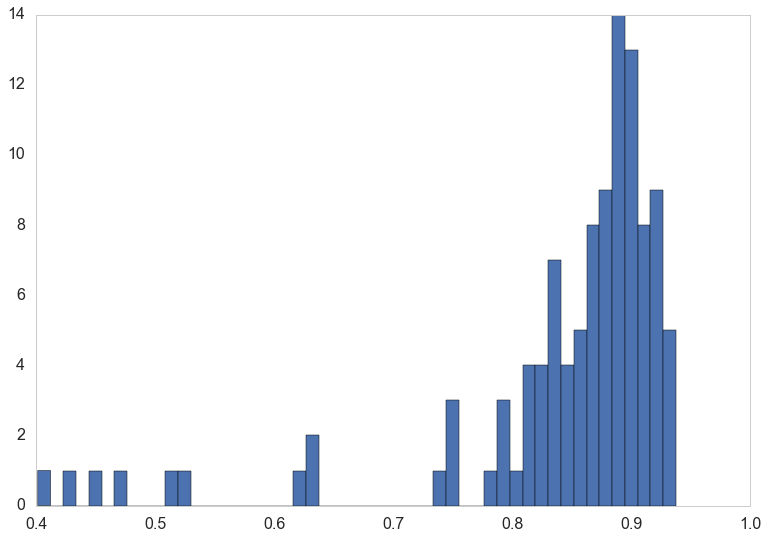

In [54]:
PCT_PF_reads_aligned_NoA = pd.read_table("20160223_PCT_PF_reads_aligned_NoA.txt", header=None)
_=plt.hist(PCT_PF_reads_aligned_NoA[0], bins=50)
plt.grid(False)

# Cleaning up the data

First of all, take the NoA files that are correlated with AdRp files with corr coeff more than .75

In [60]:
files_dict={}

for fl in glob.glob("../20160223_BamData/NoA/*"):
    a= (fl.split('/')[-1]).split('_cut')[0]
    if a:
        files_dict[a]=pd.read_csv(fl, sep="\t", header=None)[3]
NoA=pd.DataFrame(files_dict)
     
files_dict={}
for fl in glob.glob("../20160223_BamData/AdRp/*"):
    a= (fl.split('/')[-1]).split('_cut')[0]
    if a:
        files_dict[a]=pd.read_csv(fl, sep="\t", header=None)[3]   
AdRp=pd.DataFrame(files_dict)


In [64]:
NoA.head()
#AdRp.head()
correls_NoA_AdRp.head()

,0
damID2-D1_Fr188_C1_NoA,0.810604
damID2-D1_Fr188_C2_NoA,0.802184
damID2-D1_Fr188_C3_NoA,0.880018
damID2-D1_Fr188_T2_NoA,0.858407
damID2-D1_Fr188_T3_NoA,0.875243


In [ ]:
NoA = NoA[correls_NoA_AdRp[0]>.75]
AdRp = AdRp[correls_NoA_AdRp[0]>.75]

In [58]:
new_file_names_NoA=file_names_NoA[correls_NoA_AdRp[0]>.75]

# Doing a PCA of NoA

In [55]:
files_dict={}
files_dict2={}

for fl in glob.glob("../20160223_BamData/*"):
    a= (fl.split('/')[-1]).split('_cut')[0]
    if a:
        files_dict[a]=pd.read_csv(fl, sep="\t", header=None)[3]

LoadedData=pd.DataFrame(files_dict)




We normalize the column values by column sums.

In [56]:
LoadedData2=LoadedData.div(LoadedData.sum(axis=0), axis=1)
LoadedData2.head()

,damID-Dam_Fr188_C1_NoA,damID-Dam_Fr188_C2_NoA,damID-Dam_Fr188_C3_NoA,damID-Dam_Fr188_C4_NoA,damID-Dam_Fr188_T3_NoA,damID-Dam_Fr188_T4_NoA,damID-Dam_Zi257_C1_NoA,damID-Dam_Zi257_C2_NoA,damID-Dam_Zi257_C3_NoA,damID-Dam_Zi257_W_NoA,damID-Dam_Zi275_T1_NoA,damID-Lam_Fr188_C1_NoA,damID-Lam_Fr188_C2_NoA,damID-Lam_Fr188_C3_NoA,damID-Lam_Fr188_C_NoA,damID-Lam_Fr188_T2_NoA,damID-Lam_Fr188_T3_NoA,damID-Lam_Zi257_C1_NoA,damID-Lam_Zi257_C2_NoA,damID-Lam_Zi257_C3_NoA,damID-Lam_Zi257_T1_NoA,damID-Lam_Zi257_T2_NoA,damID-Lam_Zi257_T3_NoA,damID2-D1_Fr188_C1_NoA,damID2-D1_Fr188_C2_NoA,damID2-D1_Fr188_C3_NoA,damID2-D1_Fr188_T2_NoA,damID2-D1_Fr188_T3_NoA,damID2-D1_Fr89_C1_NoA,damID2-D1_Fr89_C2_NoA,damID2-D1_Fr89_C3_NoA,damID2-D1_Fr89_T2_NoA,damID2-D1_Fr89_T3_NoA,damID2-D1_Zi238_C1_NoA,damID2-D1_Zi238_C2_NoA,damID2-D1_Zi238_C3_NoA,damID2-D1_Zi238_T2_NoA,damID2-D1_Zi238_T3_NoA,damID2-D1_Zi257_C1_NoA,damID2-D1_Zi257_C2_NoA,damID2-D1_Zi257_C3_NoA,damID2-D1_Zi257_T1_NoA,damID2-D1_Zi257_T2_NoA,damID2-D1_Zi257_T3_NoA,damID2-Dam_Fr188_w_NoA,damID2-Dam_Fr89_C1_NoA,damID2-Dam_Fr89_C3_NoA,damID2-Dam_Fr89_T1_NoA,damID2-Dam_Fr89_T2_NoA,damID2-Dam_Fr89_T3_NoA,...,damID2-Lam_Zi238_C3_NoA,damID2-Lam_Zi257_C4_NoA,damID3-D1_Fr188_T_NoA,damID3-D1_Fr188_w1_NoA,damID3-D1_Fr188_w2_NoA,damID3-D1_Fr188_w3_NoA,damID3-D1_Fr89_w1_NoA,damID3-D1_Fr89_w2_NoA,damID3-D1_Fr89_w3_NoA,damID3-D1_Zi238_T_NoA,damID3-D1_Zi238_w1_NoA,damID3-D1_Zi238_w2_NoA,damID3-D1_Zi238_w3_NoA,damID3-D1_Zi257_T_NoA,damID3-D1_Zi257_w1_NoA,damID3-D1_Zi257_w2_NoA,damID3-D1_Zi257_w3_NoA,damID3-Dam_Fr188_T2_NoA,damID3-Dam_Fr188_w1_NoA,damID3-Dam_Fr188_w2_NoA,damID3-Dam_Fr188_w3_NoA,damID3-Dam_Fr89_w1_NoA,damID3-Dam_Fr89_w2_NoA,damID3-Dam_Fr89_w3_NoA,damID3-Dam_Zi238_T1_NoA,damID3-Dam_Zi238_T2_NoA,damID3-Dam_Zi238_w1_NoA,damID3-Dam_Zi238_w2_NoA,damID3-Dam_Zi238_w3_NoA,damID3-Dam_Zi257_T1_NoA,damID3-Dam_Zi257_T2_NoA,damID3-Dam_Zi257_w1_NoA,damID3-Dam_Zi257_w2_NoA,damID3-Dam_Zi257_w3_NoA,damID3-Lam_Fr188_T1_NoA,damID3-Lam_Fr188_T4_NoA,damID3-Lam_Fr188_w1_NoA,damID3-Lam_Fr188_w2_NoA,damID3-Lam_Fr188_w3_NoA,damID3-Lam_Fr89_T1_NoA,damID3-Lam_Fr89_T2_NoA,damID3-Lam_Fr89_w1_NoA,damID3-Lam_Fr89_w2_NoA,damID3-Lam_Fr89_w3_NoA,damID3-Lam_Zi238_w1_NoA,damID3-Lam_Zi238_w2_NoA,damID3-Lam_Zi238_w3_NoA,damID3-Lam_Zi257_w1_NoA,damID3-Lam_Zi257_w2_NoA,damID3-Lam_Zi257_w3_NoA
0,0,0.000000e+00,0.000000e+00,0,0.000000e+00,1.304929e-07,0.000000e+00,0,1.865963e-07,2.722531e-07,0,2.154039e-07,2.122395e-07,1.860153e-07,0.000000e+00,0.000000e+00,3.564403e-07,0.000000e+00,7.243763e-08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0,0,0,0,0,0.000000e+00,0,0,0,3.462190e-07,0.000000e+00,0,0,0.000000e+00,0,0.000000e+00,0.000000e+00,0,0,0,0,...,0.000000e+00,0,0.000000e+00,0.000000e+00,0,0.000000e+00,0.000000e+00,1.349402e-07,0.000000e+00,0,1.654187e-07,1.772748e-07,0,0,0.000000e+00,0,0.000000e+00,1.062192e-07,0,0.000000e+00,0.000000e+00,2.184250e-07,0.000000e+00,0.000000e+00,0,0,0,0,0.000000e+00,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.145864e-07,0.000000e+00,2.520269e-07,0.000000e+00,0,0.000000e+00,1.920058e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,0.000000e+00
1,0,1.503984e-07,1.268971e-07,0,0.000000e+00,1.304929e-07,0.000000e+00,0,1.865963e-07,2.722531e-07,0,2.154039e-07,2.122395e-07,1.860153e-07,0.000000e+00,0.000000e+00,3.564403e-07,7.024577e-08,7.243763e-08,0.000000e+00,0.000000e+00,1.011292e-07,2.278709e-07,0,0,0,0,0,0,0,0,0,0,0,0.000000e+00,0,0,0,3.462190e-07,0.000000e+00,0,0,4.389311e-07,0,0.000000e+00,0.000000e+00,0,0,0,0,...,0.000000e+00,0,0.000000e+00,0.000000e+00,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0,1.654187e-07,1.772748e-07,0,0,0.000000e+00,0,0.000000e+00,1.062192e-07,0,0.000000e+00,0.000000e+00,2.184250e-07,0.000000e+00,0.000000e+00,0,0,0,0,0.000000e+00,0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.145864e-07,0.000000e+00,0.000000e+00,0.000000e+00,0,0.000000e+00,1.920058e-07,0.000000e+00,0.000000e+00,1.5

In [ ]:
pca = PCA(n_components=10)
X = pca.fit_transform(LoadedData2.transpose())
print pca.explained_variance_ratio_.sum(), "percentage var explained"
print pca.explained_variance_ratio_*100, "explained by first PCs"

df=pd.DataFrame()
for i in range(pca.explained_variance_ratio_.shape[0]):
    df["pc%i" % (i+1)] = X[:,i]

colors = ["blue", "red", "green"]
labels= ["Dam","Lam", "D1"]

for label, color in zip(labels, colors):
    mask = [file_names_NoA.loc[name].protein==label for name in LoadedData2.columns]
    plt.scatter(df[mask]['pc1'], df[mask]['pc2'], c=color, label=label)
plt.legend()
plt.grid(False)
plt.show()


We divide our datasets into Lam, dam, and D1. This involves first separating dataset

In [ ]:
DamMask = [file_names_NoA.loc[name].protein=="Dam" for name in LoadedData2.columns]
LamMask = [file_names_NoA.loc[name].protein=="Lam" for name in LoadedData2.columns]
D1Mask = [file_names_NoA.loc[name].protein=="D1" for name in LoadedData2.columns]

In [ ]:
Lam=LoadedData2.ix[:,LamMask]
Dam=LoadedData2.ix[:,DamMask]
D1=LoadedData2.ix[:,D1Mask]

In [ ]:
def plot_PCA(Lam):
    pca = PCA(n_components=10)
    X = pca.fit_transform(Lam.transpose())
    print pca.explained_variance_ratio_.sum(), "percentage var explained"
    print pca.explained_variance_ratio_*100, "explained by first PCs"
    
    df=pd.DataFrame()
    for i in range(pca.explained_variance_ratio_.shape[0]):
        df["pc%i" % (i+1)] = X[:,i]
        
    colors = ["blue", "red", "green"]
    labels= ["T","C", "w"]

    for label, color in zip(labels, colors):
        mask = [file_names_NoA.loc[name].Tissue==label for name in Lam.columns]
        plt.scatter(df[mask]['pc1'], df[mask]['pc2'], c=color, label=label)
    plt.legend()
    plt.grid(False)
    plt.show()

    colors = ["blue", "red", "yellow", 'green']
    labels= ["188","238","257", "89"]

    for label, color in zip(labels, colors):
        mask = [file_names_NoA.loc[name].Line==label for name in Lam.columns]
        plt.scatter(df[mask]['pc1'], df[mask]['pc2'], c=color, label=label)
    plt.legend()
    plt.grid(False)
    plt.show()


In [ ]:
plot_PCA(Lam)

In [ ]:
plot_PCA(Dam)

In [ ]:
plot_PCA(D1)

In [ ]:
print max(pca.components_[0])
print np.argmax(pca.components_[0])
    